In [1]:
pip install ultralytics opencv-python pillow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
from ultralytics import YOLO

# Load the trained model (your .pt file)
model = YOLO("/Users/adityanarayankonwar/Library/CloudStorage/OneDrive-Personal/streptomyces_model_3_yolo11/streptomyces_model_yolo11_best.pt")  # e.g., 'streptomyces_model.pt'

In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage.feature import local_binary_pattern


In [7]:
# ==== PARAMETERS ====
IMG_SIZE = (512, 512)
LBP_RADIUS = 3
LBP_POINTS = 8 * LBP_RADIUS


In [3]:
from matplotlib import pyplot as plt

In [4]:
def generate_lbp(gray_img):
    lbp = local_binary_pattern(gray_img, LBP_POINTS, LBP_RADIUS, method='uniform')
    lbp = ((lbp - lbp.min()) / (lbp.max() - lbp.min()) * 255).astype(np.uint8)
    return lbp

def enhance_saturation_clahe(bgr_img):
    hsv = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2HSV)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    hsv[..., 1] = clahe.apply(hsv[..., 1])
    enhanced = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    return enhanced

def preprocess_image(image_path):
    img = cv2.imread(image_path)
    assert img is not None, f"❌ Cannot read image: {image_path}"
    img = cv2.resize(img, IMG_SIZE)

    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    lbp = generate_lbp(gray)
    clahe_img = enhance_saturation_clahe(img)
    hsv = cv2.cvtColor(clahe_img, cv2.COLOR_BGR2HSV)
    sat_clahe = hsv[..., 1]

    processed = cv2.merge([lbp, sat_clahe, sat_clahe]).astype(np.uint8)

    # Show processed image
    plt.figure(figsize=(6, 6))
    plt.imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    plt.title("🧪 Preprocessed Input (LBP + CLAHE only)")
    plt.axis('off')
    plt.show()

    return processed, img


    

In [5]:
def predict(image_path):
    processed_img, original_img = preprocess_image(image_path)
    results = model.predict(source=processed_img, imgsz=IMG_SIZE[0])

    pred_class = results[0].probs.top1
    conf = results[0].probs.top1conf
    label = model.names[pred_class] if model.names else f"Class-{pred_class}"

    print(f"🧠 Prediction: {label} (Confidence: {conf:.2f})")
    return label, conf

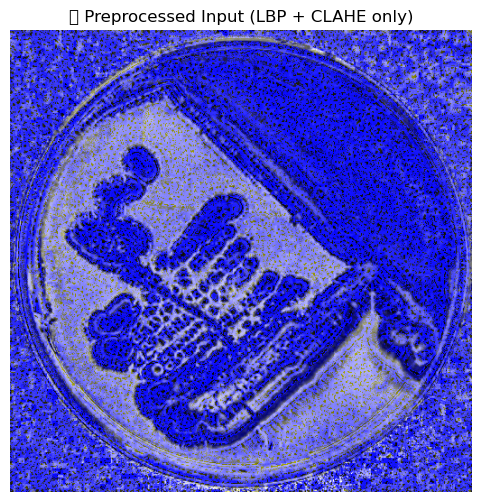


0: 512x512 Streptomyces 1.00, non_streptomyces 0.00, 565.5ms
Speed: 261.7ms preprocess, 565.5ms inference, 0.2ms postprocess per image at shape (1, 3, 512, 512)
🧠 Prediction: Streptomyces (Confidence: 1.00)


('Streptomyces', tensor(0.9999))

In [9]:
image_path = "/Users/adityanarayankonwar/Desktop/DSM_42136.jpg"
predict(image_path)